In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()


In [2]:
# Load the dataset 
data_files = ['stories_art-et-culture.csv', 'stories_economie.csv', 'stories_politique.csv', 'stories_regions.csv', 'stories_societe.csv', 'stories_sport.csv']
df = pd.concat((pd.read_csv(filename) for filename in data_files))

In [3]:
# Display the first few rows of the dataset
df.head()

,Unnamed: 0,id,title,date,author,story,topic
0,0,f06aa998054e11eba66e646e69d991ea,"""بيت الشعر"" يسائل وزير الثقافة عن كوابيس سوداء",الجمعة 02 أكتوبر 2020 - 23:19,هسبريس من الرباط,"وجه ""بيت الشعر في المغرب"" إلى وزير الثقافة وال...",art-et-culture
1,1,f1cf1b9c054e11ebb718646e69d991ea,"مهرجان ""سينما المؤلّف"" يستحضر روح ثريا جبران",الجمعة 02 أكتوبر 2020 - 07:26,هسبريس من الرباط,في ظلّ استمرار حالة الطوارئ الصحية المرتبطة بج...,art-et-culture
2,2,f2d282a4054e11eb800f646e69d991ea,"فيلم ""بدون عنف"" لهشام العسري ..""كعب الحذاء ووا...",الجمعة 02 أكتوبر 2020 - 04:00,عفيفة الحسينات*,تشير مشاهدة فيلم قصير ضمن الثلاثية الأخيرة للم...,art-et-culture
3,3,f3f46cac054e11eba403646e69d991ea,"""تنين ووهان"" .. مريم أيت أحمد توقِّع أولى ""روا...",الجمعة 02 أكتوبر 2020 - 02:00,حاورَها: وائل بورشاشن,"مِن قَلب أيّام ""الحَجْر""، رأتِ النّورَ الفصول ...",art-et-culture
4,4,f50f0476054e11eba31b646e69d991ea,"مسكر يتخلّى عن دعم ""الوزارة"" بسبب ""الجمهور""",الخميس 01 أكتوبر 2020 - 19:40,هسبريس من الرباط,أعلن الفنان المغربيّ سعيد مسكر تخليه عن مبلغ ا...,art-et-culture


In [4]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6000 non-null   int64 
 1   id          6000 non-null   object
 2   title       6000 non-null   object
 3   date        6000 non-null   object
 4   author      6000 non-null   object
 5   story       6000 non-null   object
 6   topic       6000 non-null   object
dtypes: int64(1), object(6)
memory usage: 375.0+ KB


**Insight 1: Number of Examples per Class (Topic)**  
We'll start by examining the distribution of examples across different topics.


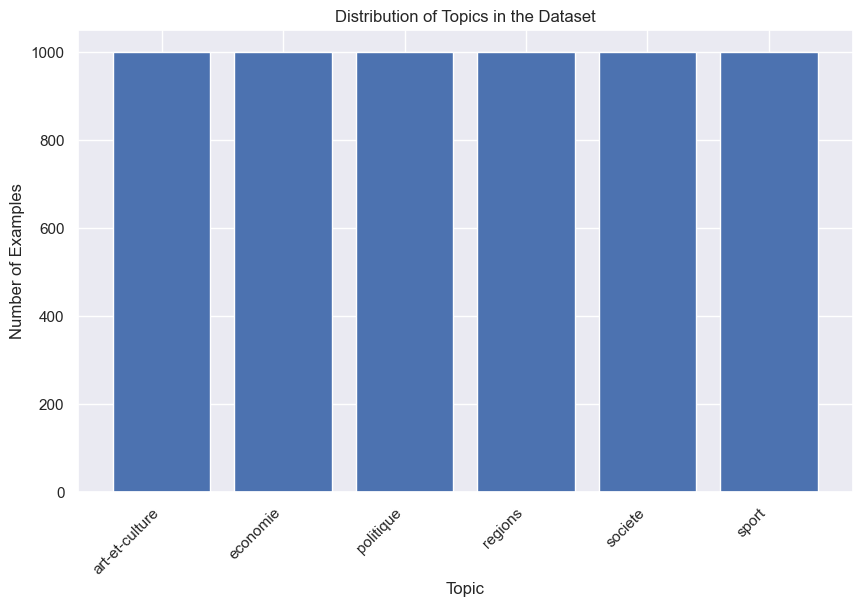

In [5]:
# Count the number of examples per topic
topic_counts = df['topic'].value_counts()

# Plot the distribution of topics
plt.figure(figsize=(10, 6))
plt.bar(topic_counts.index, topic_counts.values)
plt.xlabel('Topic')
plt.ylabel('Number of Examples')
plt.title('Distribution of Topics in the Dataset')
plt.xticks(rotation=45, ha='right')
plt.show()

**Insight 2: Top Frequent N-grams**  
Next, we'll analyze the most frequent n-grams (word sequences) in the 'story' column to gain insights into the text data.

In [6]:
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.util import ngrams


In [7]:
# Tokenize the 'story' column and create n-grams (2-grams) for analysis
story_tokens = df['story'].apply(word_tokenize)
n = 2  # You can change n to analyze different n-grams (e.g., 3 for 3-grams)

# Count the occurrences of n-grams
ngram_counts = Counter(ngrams([token for sublist in story_tokens for token in sublist], n))

# Display the top 10 most frequent n-grams
top_ngrams = ngram_counts.most_common(10)
print("Top 10 most frequent", n, "-grams:")
for ngram, count in top_ngrams:
    print(' '.join(ngram), ':', count)


Top 10 most frequent 2 -grams:
'' ، : 11428
: `` : 4807
أن `` : 3719
إلى أن : 2730
'' . : 2441
من أجل : 2386
في المائة : 1927
من خلال : 1775
كورونا '' : 1647
وهو ما : 1486


**Insight 3: Lengths of Examples in Words and Letters**  
Lastly, we'll examine the lengths of examples in terms of the number of words and letters to understand the distribution.

         num_words   num_letters
count  6000.000000   6000.000000
mean    337.425000   1673.022500
std     256.424996   1222.278727
min      28.000000    127.000000
25%     185.000000    933.000000
50%     295.000000   1486.500000
75%     406.000000   2016.500000
max    6180.000000  27411.000000


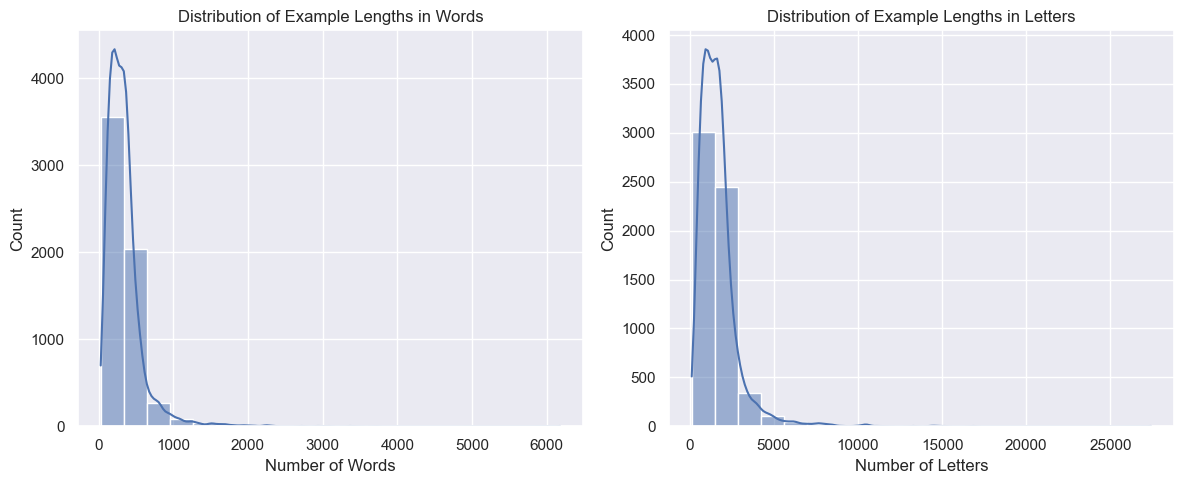

In [8]:
# Count the number of words in each example
df['num_words'] = df['story'].apply(lambda x: len(word_tokenize(x)))

# Count the number of letters (characters) in each example
df['num_letters'] = df['story'].apply(lambda x: len(x.replace(" ", "")))

# Summary statistics for the number of words and letters
print(df[['num_words', 'num_letters']].describe())

# Plot the distribution of the number of words and letters
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['num_words'], bins=20, kde=True)
plt.xlabel('Number of Words')
plt.ylabel('Count')
plt.title('Distribution of Example Lengths in Words')

plt.subplot(1, 2, 2)
sns.histplot(df['num_letters'], bins=20, kde=True)
plt.xlabel('Number of Letters')
plt.ylabel('Count')
plt.title('Distribution of Example Lengths in Letters')

plt.tight_layout()
plt.show()
